In [64]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 15, 6
df = pd.read_csv("C:/Users/marut/Desktop/Masters Project/Data Engineer/Data Science/sales_train_v2.csv")
df.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


In [65]:
#df['date'] = pd.to_datetime(df['date'], format='%mm.%dd.%YYYY')
df['date'] = pd.to_datetime(df.date)

In [66]:
df.head(10)
df.tail(5)
df.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

In [67]:
df.date.dt.weekday_name.head(5)


0       Friday
1       Friday
2    Wednesday
3     Saturday
4      Tuesday
Name: date, dtype: object

In [68]:
df['Year'] =df.date.dt.year
df.head(5)
df.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
Year                       int64
dtype: object

In [69]:
df['Month'] =df.date.dt.month
df.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month
0,2013-02-01,0,59,22154,999.00,1.0,2013,2
1,2013-03-01,0,25,2552,899.00,1.0,2013,3
2,2013-05-01,0,25,2552,899.00,-1.0,2013,5
3,2013-06-01,0,25,2554,1709.05,1.0,2013,6
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1


In [9]:
df['day'] =df.date.dt.weekday_name
df.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,day
0,2013-02-01,0,59,22154,999.00,1.0,2013,2,Friday
1,2013-03-01,0,25,2552,899.00,1.0,2013,3,Friday
2,2013-05-01,0,25,2552,899.00,-1.0,2013,5,Wednesday
3,2013-06-01,0,25,2554,1709.05,1.0,2013,6,Saturday
4,2013-01-15,0,25,2555,1099.00,1.0,2013,1,Tuesday


In [70]:
df["Total sales"] = df["item_price"] * df["item_cnt_day"]
df.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Year,Month,Total sales
0,2013-02-01,0,59,22154,999.0,1.0,2013,2,999.0
1,2013-03-01,0,25,2552,899.0,1.0,2013,3,899.0


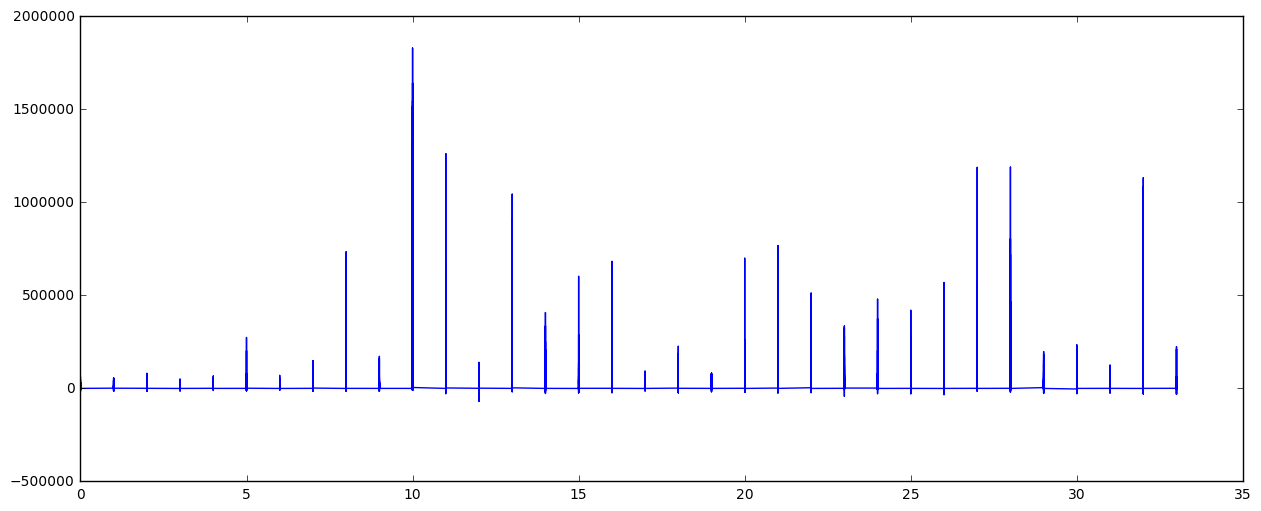

In [71]:
x = df['date_block_num']
y = df['Total sales']
plt.plot(x,y)

In [94]:
print ('number of shops: ', df['shop_id'].max())
print ('number of items: ', df['item_id'].max())
num_month = df['date_block_num'].max()
print ('number of month: ', num_month)
print ('size of train: ', df.shape)
df.head()
df.dtypes

#df = df.drop(labels = ['date', 'item_price'], axis = 1)


#x = df['shop_id']
#y = df['Total sales']
#plt.plot(x,y)

number of shops:  59
number of items:  22169
number of month:  33
size of train:  (2935849, 9)


date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
Year                       int64
Month                      int64
Total sales                int32
dtype: object

In [95]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
   

C:\Users\marut\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
C:\Users\marut\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


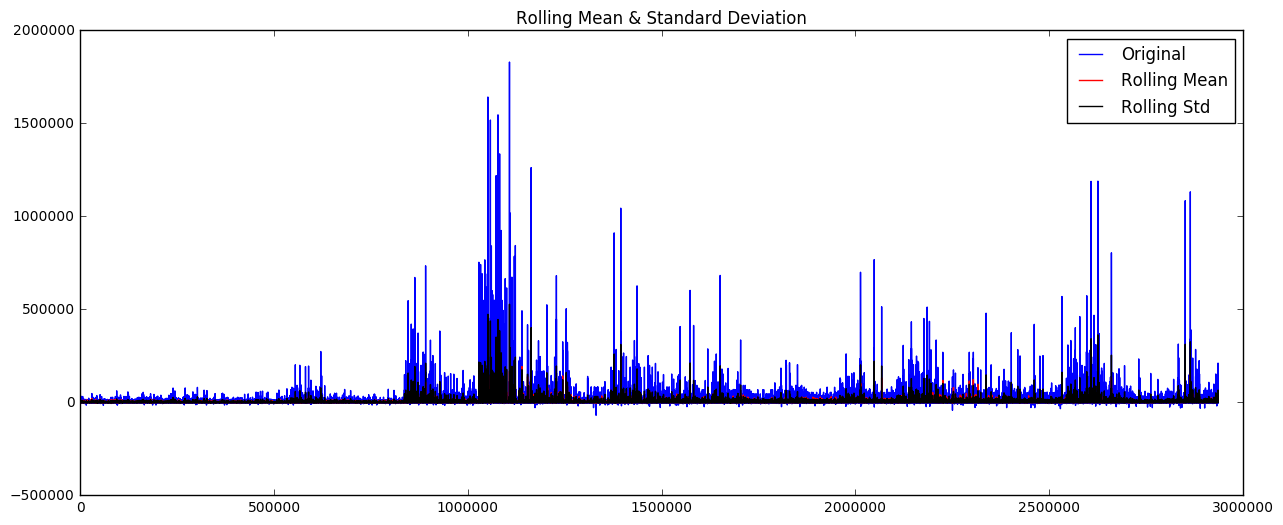

In [96]:
test_stationarity(df['Total sales'])


In [97]:
cols = df.columns.tolist()
cols
df = df[cols]


In [102]:
x = ['Total sales', 'Year']
ts = df[x]
ts.head(2)


,Total sales,Year
0,999,2013
1,899,2013


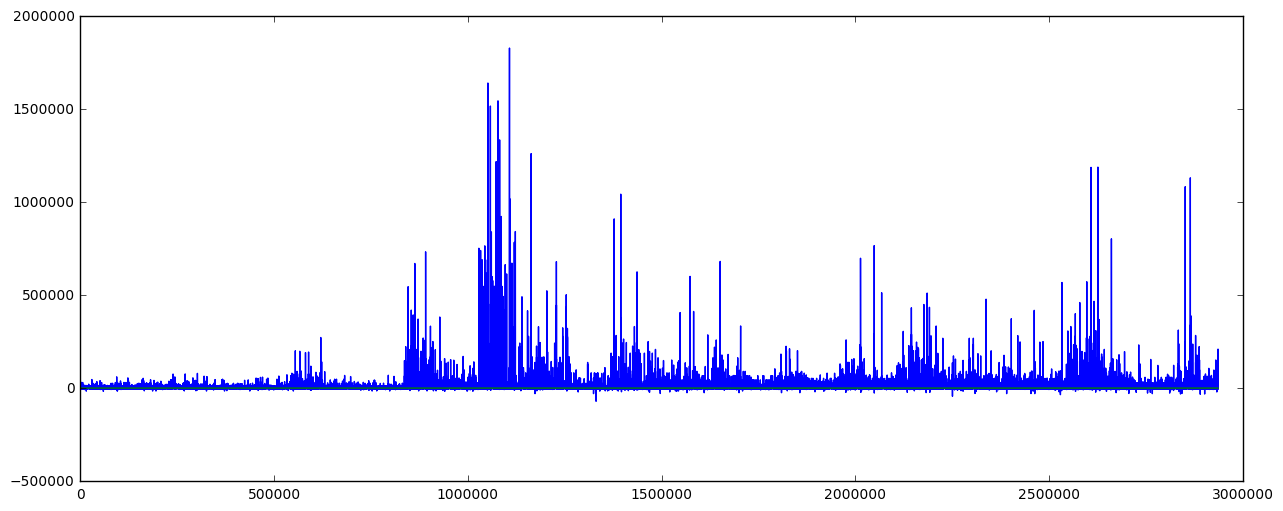

In [103]:
ts.head(2)
ts.dtypes
plt.plot(ts)

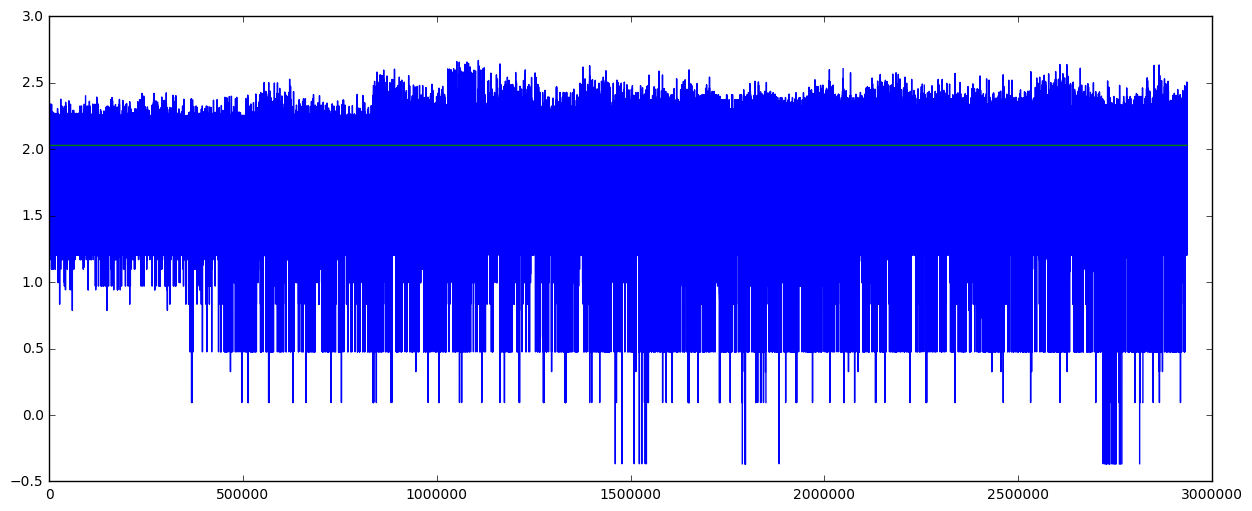

In [105]:
ts_log = np.log(ts)
plt.plot(ts_log)


C:\Users\marut\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


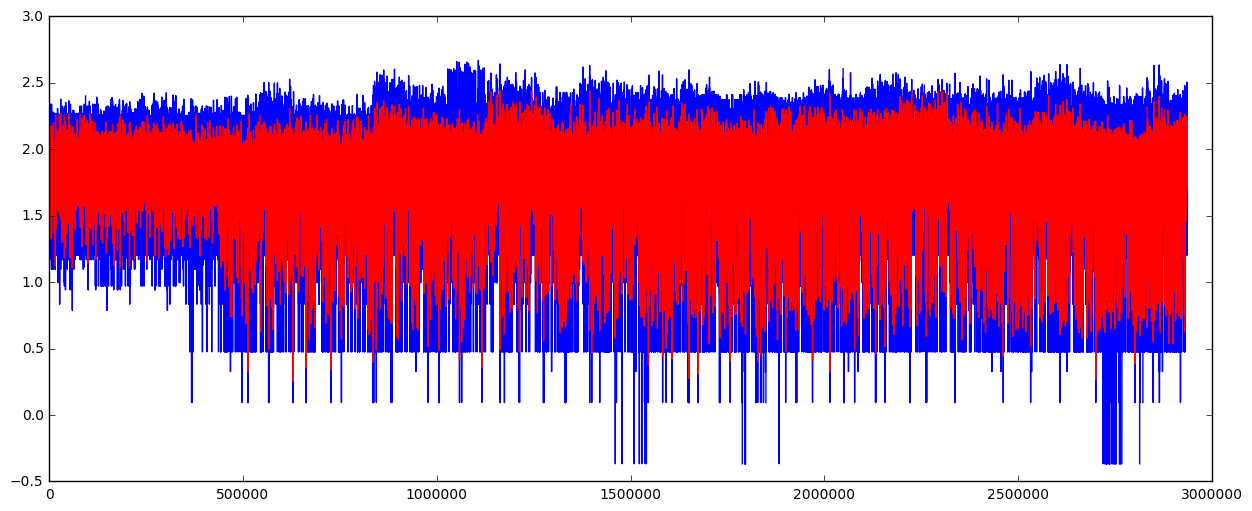

In [107]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


In [108]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(14)

,Total sales,Year
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


C:\Users\marut\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
C:\Users\marut\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()


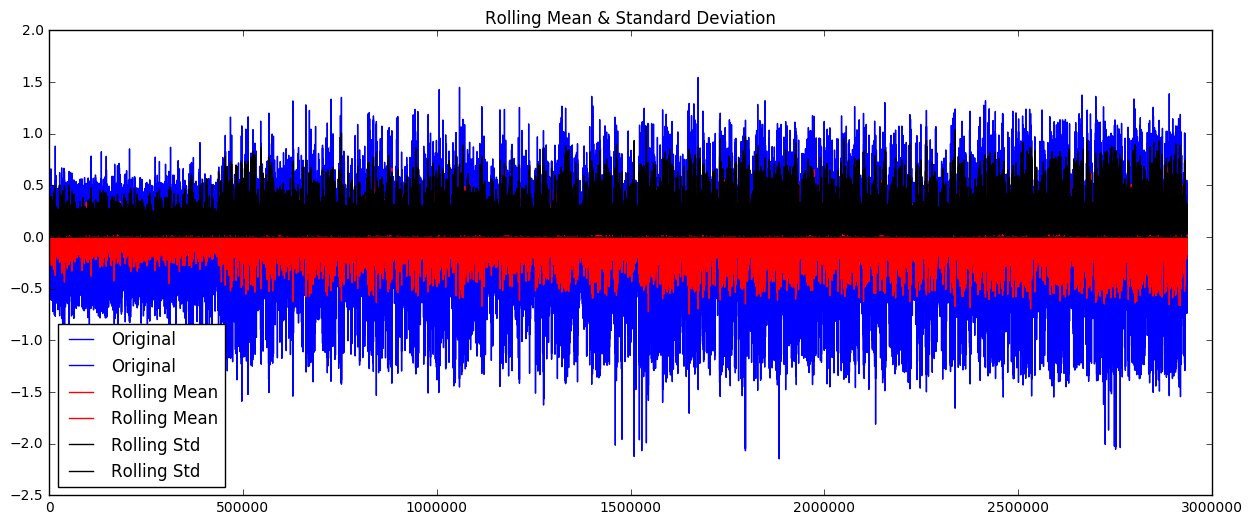

In [109]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Users\marut\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


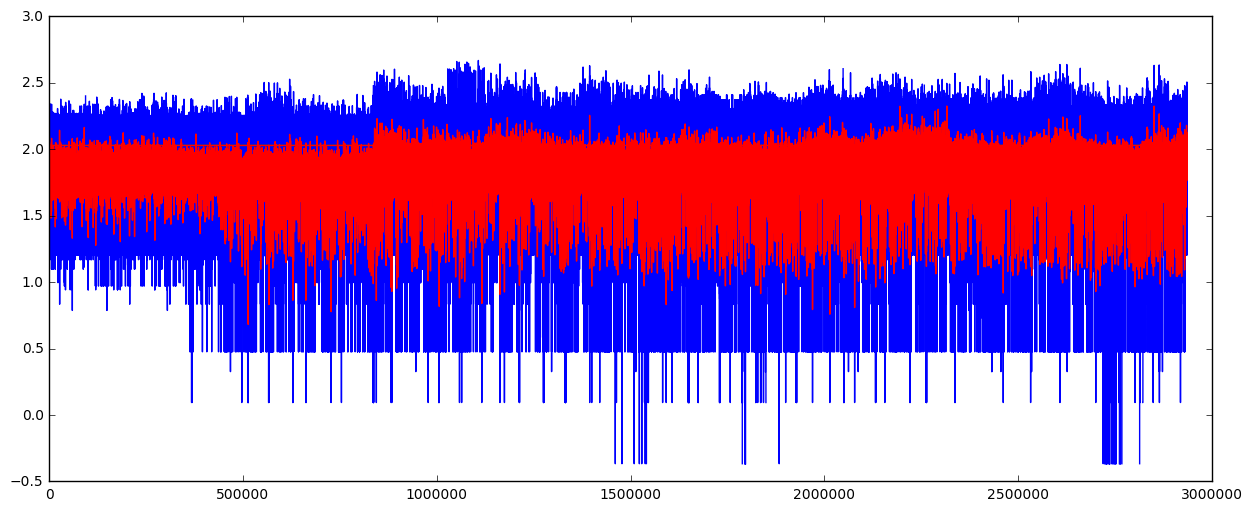

In [110]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\Users\marut\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
C:\Users\marut\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()


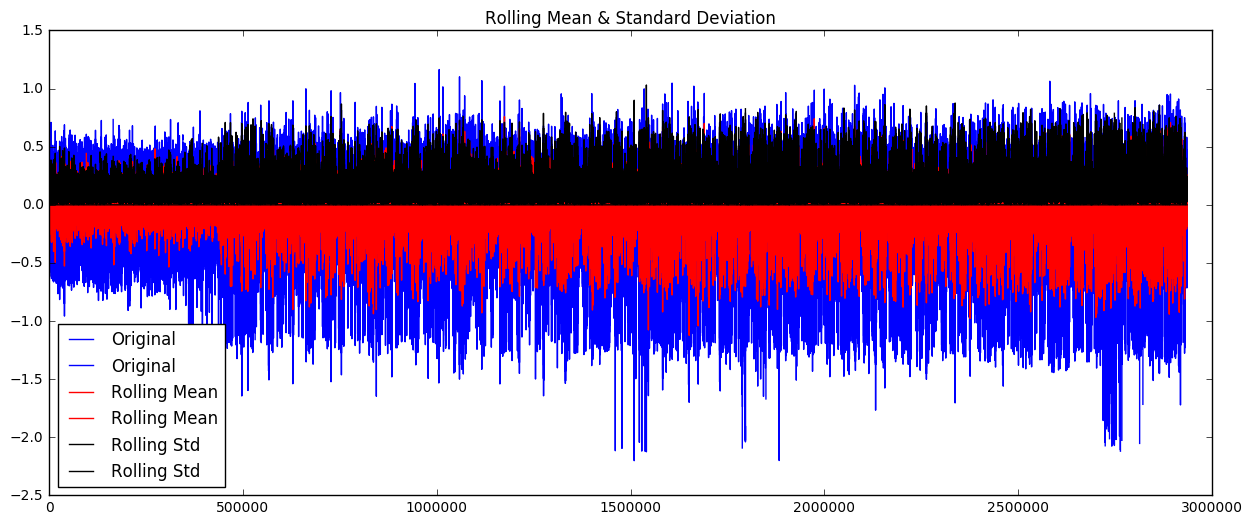

In [111]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

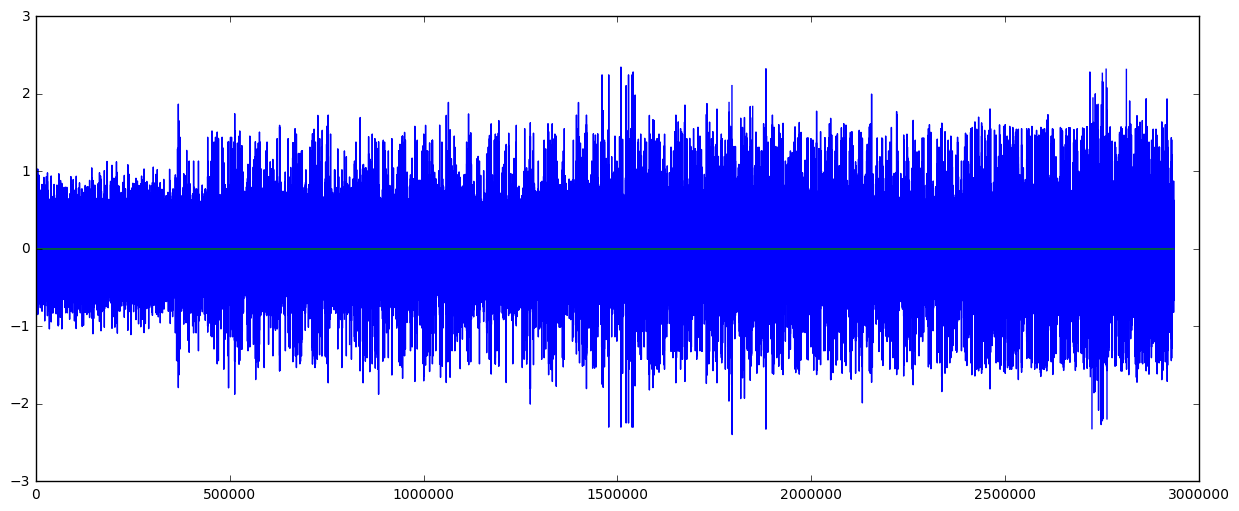

In [112]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\marut\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
C:\Users\marut\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).std()


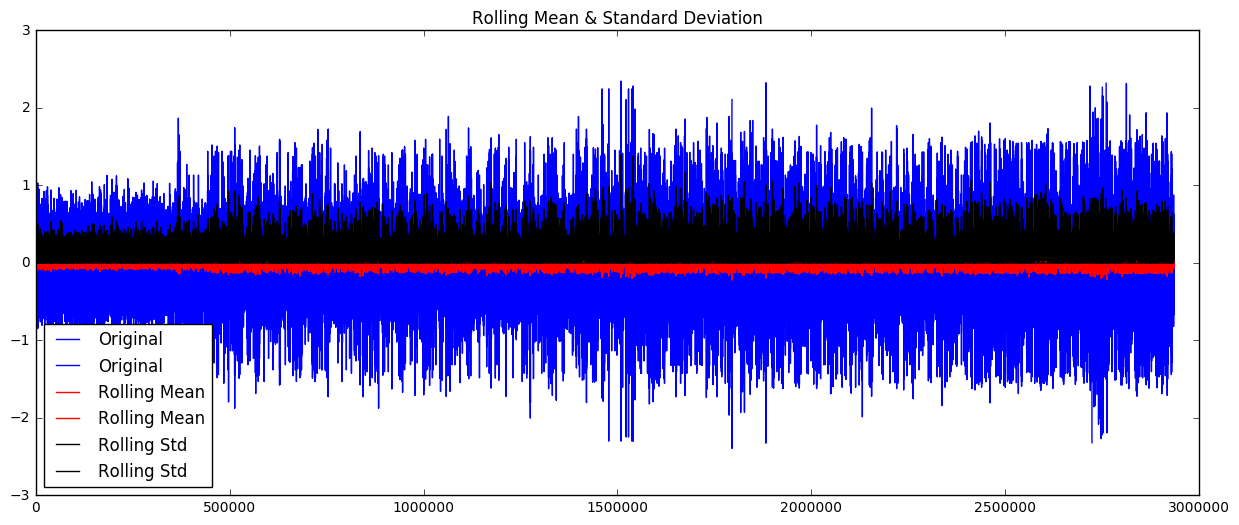

In [113]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)


In [116]:
ts_log.index
ts_log_diff.index

Int64Index([      1,       4,       5,       6,       7,       8,       9,
                 10,      11,      12,
            ...
            2935839, 2935840, 2935841, 2935842, 2935843, 2935844, 2935845,
            2935846, 2935847, 2935848],
           dtype='int64', length=2915506)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))